In [ ]:
!pip install -q datasets evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 16.1.0 which is incompatible.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but y

In [ ]:
!pip install -q wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.2/300.2 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.0 MB/s eta 0:00:00


If running this notebook in Colab, please ensure that your Hugging Face `HF_TOKEN` and your Weights & Biases `WANDB_API_KEY` are added to your Colab secrets.

Alternatively, please login to Hugging Face and Weights & Biases by running the following two cells.

In [ ]:
# !huggingface-cli login

In [ ]:
# !wandb login

In [ ]:
import os
import random
import numpy as np
import torch

def seed_everything(seed):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything(42)

In [ ]:
from datasets import load_dataset

fashion_mnist = load_dataset("zalando-datasets/fashion_mnist")
fashion_mnist

Generating train split:   0%|          | 0/60000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 60000
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 10000
    })
})

In [ ]:
features = fashion_mnist['train'].features
features

{'image': Image(mode=None, decode=True, id=None),
 'label': ClassLabel(names=['T - shirt / top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'], id=None)}

In [ ]:
id2label = {id: label for id, label in enumerate(features['label'].names)}
id2label

{0: 'T - shirt / top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

In [ ]:
label2id = {label: id for id, label in id2label.items()}
label2id

{'T - shirt / top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
example = fashion_mnist['train'][0]
example

{'image': <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28>,
 'label': 9}

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

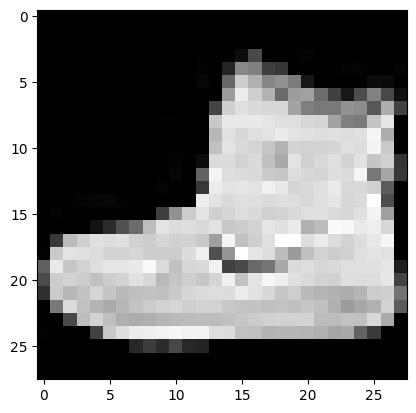

In [ ]:
plt.imshow(example['image'], cmap='gray');

In [ ]:
id2label[example['label']]

'Ankle boot'

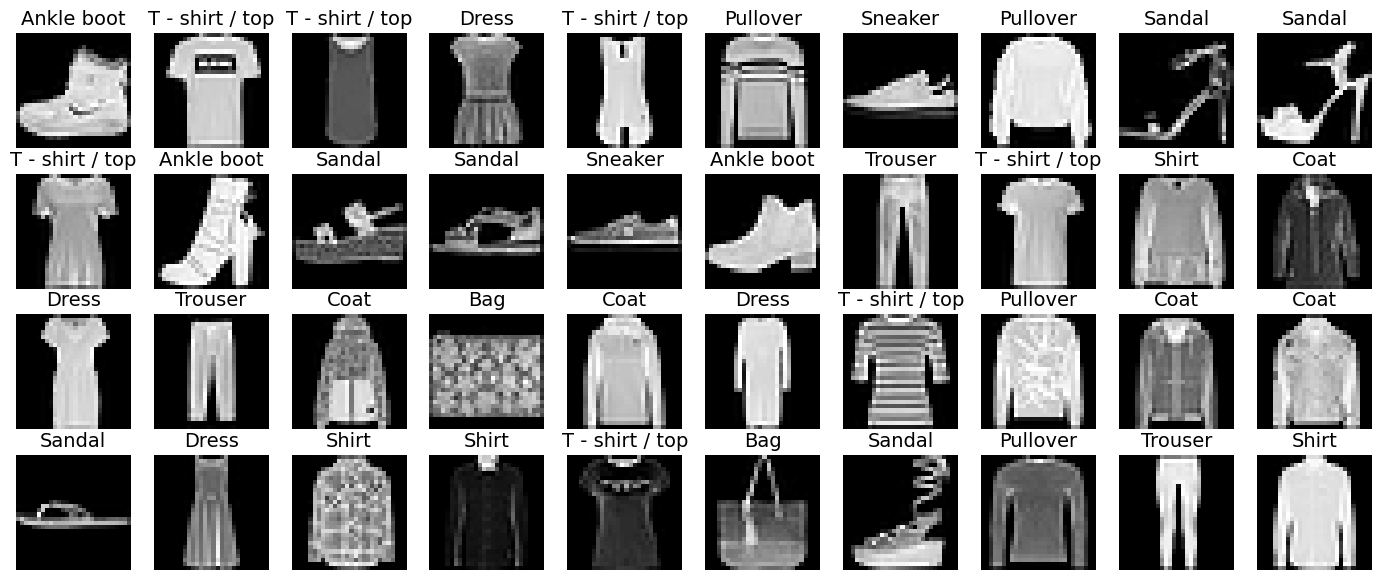

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.75, n_rows * 1.75))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        example = fashion_mnist['train'][index]
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(example['image'], cmap='gray')
        plt.axis('off')
        plt.title(id2label[example['label']])
plt.show()

In [ ]:
train_ds = fashion_mnist['train'].select(range(55000))
valid_ds = fashion_mnist['train'].select(range(55000, 60000))
test_ds = fashion_mnist['test']
len(train_ds), len(valid_ds), len(test_ds)

(55000, 5000, 10000)

In [ ]:
from torch.utils.data import Dataset, DataLoader

class FashionMNISTDataset(Dataset):
    def __init__(self, ds, tfms):
        self.ds = ds
        self.tfms = tfms

    def __len__(self):
        return len(self.ds)

    def __getitem__(self, idx):
        example = self.ds[idx]
        return self.tfms(example['image']), example['label']

In [ ]:
import torchvision.transforms.v2 as v2

tfms = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True)
])

In [ ]:
train_set = FashionMNISTDataset(train_ds, tfms)
len(train_set)

55000

In [ ]:
# Sanity check:
img, label = train_set[0]
img.shape, label

(torch.Size([1, 28, 28]), 9)

In [ ]:
valid_set = FashionMNISTDataset(valid_ds, tfms)
test_set = FashionMNISTDataset(test_ds, tfms)
len(valid_set), len(test_set)

(5000, 10000)

In [ ]:
batch_size = 64
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
len(train_loader)

860

In [ ]:
# Sanity check:
x_batch, y_batch = next(iter(train_loader))
x_batch.shape, y_batch.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

In [ ]:
x_batch.dtype, y_batch.dtype

(torch.float32, torch.int64)

In [ ]:
valid_loader = DataLoader(valid_set, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)
len(valid_loader), len(test_loader)

(79, 157)

In [ ]:
device = torch.device("cpu")
device

device(type='cpu')

In [ ]:
import torch.nn as nn
from huggingface_hub import PyTorchModelHubMixin

class MLP(nn.Module, PyTorchModelHubMixin):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28 * 28, 300)
        self.fc2 = nn.Linear(300, 100)
        self.fc3 = nn.Linear(100, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        act = torch.relu(self.fc1(x))
        act = torch.relu(self.fc2(act))
        return self.fc3(act)

In [ ]:
model = MLP()
model.to(device)

MLP(
  (fc1): Linear(in_features=784, out_features=300, bias=True)
  (fc2): Linear(in_features=300, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)

In [ ]:
# Sanity check:
x_batch = x_batch.to(device)
with torch.no_grad():
    logits = model(x_batch)
logits.shape

torch.Size([64, 10])

In [ ]:
loss_fn = nn.CrossEntropyLoss(reduction='sum')

In [ ]:
# Sanity check:
y_batch = y_batch.to(device)
with torch.no_grad():
    loss = loss_fn(logits, y_batch)
loss

tensor(147.1372)

In [ ]:
from torch.optim import SGD

learning_rate = 1e-2
optimizer = SGD(model.parameters(), lr=learning_rate)
n_epochs = 30

In [ ]:
def train_epoch():
    model.train()
    train_loss = 0
    for x_batch, y_batch in train_loader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        logits = model(x_batch)
        loss = loss_fn(logits, y_batch)
        train_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_loss /= len(train_set)
    train_loss = round(train_loss, 4)
    return train_loss

In [ ]:
import evaluate

def validate_epoch():
    model.eval()
    valid_loss = 0
    metric = evaluate.load("accuracy")
    for x_batch, y_batch in valid_loader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        with torch.no_grad():
            logits = model(x_batch)
            loss = loss_fn(logits, y_batch)
        valid_loss += loss.item()
        preds = logits.argmax(dim=-1)
        metric.add_batch(predictions=preds, references=y_batch)
    valid_loss /= len(valid_set)
    valid_loss = round(valid_loss, 4)
    computed_metric = metric.compute()
    acc = round(computed_metric['accuracy'], 4)
    return valid_loss, acc

In [ ]:
import wandb

wandb_config = {
    'architecture': "MLP",
    'dataset': "Fashion-MNIST",
    'batch_size': batch_size,
    'learning_rate': learning_rate,
    'n_epochs': n_epochs
}
wandb.init(
    project="mlp-fashion-mnist",
    config=wandb_config,
    notes="Logging min of `train_loss` & `valid_loss`, and max of `accuracy`."
)
wandb.define_metric("train_loss", summary="min")
wandb.define_metric("valid_loss", summary="min")
wandb.define_metric("accuracy", summary="max")

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
best_epoch = 0
best_acc = 0
for epoch in range(n_epochs):
    train_loss = train_epoch()

    valid_loss, acc = validate_epoch()

    wandb.log({'train_loss': train_loss, 'valid_loss': valid_loss, 'accuracy': acc})

    print(f"Epoch: {epoch}, Training Loss: {train_loss}, Validation Loss: {valid_loss}, Accuracy: {acc}")

    if acc > best_acc:
        best_epoch = epoch
        best_acc = acc
        model.push_to_hub("mlp-fashion-mnist", commit_message=f"epoch: {epoch}, accuracy: {acc}")
    print("---")
wandb.finish()
print("---")
print("Done!")
print(f"Best Epoch: {best_epoch}, Best Accuracy: {best_acc}")

Epoch: 0, Training Loss: 0.8696, Validation Loss: 0.5379, Accuracy: 0.7912


model.safetensors:   0%|          | 0.00/1.07M [00:00<?, ?B/s]

---
Epoch: 1, Training Loss: 0.5215, Validation Loss: 0.4485, Accuracy: 0.8382


model.safetensors:   0%|          | 0.00/1.07M [00:00<?, ?B/s]

---
Epoch: 2, Training Loss: 0.4421, Validation Loss: 0.4068, Accuracy: 0.8538


model.safetensors:   0%|          | 0.00/1.07M [00:00<?, ?B/s]

---
Epoch: 3, Training Loss: 0.4078, Validation Loss: 0.3759, Accuracy: 0.8678


model.safetensors:   0%|          | 0.00/1.07M [00:00<?, ?B/s]

---
Epoch: 4, Training Loss: 0.3772, Validation Loss: 0.3707, Accuracy: 0.8682


model.safetensors:   0%|          | 0.00/1.07M [00:00<?, ?B/s]

---
Epoch: 5, Training Loss: 0.356, Validation Loss: 0.4232, Accuracy: 0.8298
---
Epoch: 6, Training Loss: 0.3459, Validation Loss: 0.3554, Accuracy: 0.872


model.safetensors:   0%|          | 0.00/1.07M [00:00<?, ?B/s]

---
Epoch: 7, Training Loss: 0.332, Validation Loss: 0.3507, Accuracy: 0.8726


model.safetensors:   0%|          | 0.00/1.07M [00:00<?, ?B/s]

---
Epoch: 8, Training Loss: 0.3211, Validation Loss: 0.3566, Accuracy: 0.8764


model.safetensors:   0%|          | 0.00/1.07M [00:00<?, ?B/s]

---
Epoch: 9, Training Loss: 0.3112, Validation Loss: 0.3765, Accuracy: 0.8694
---
Epoch: 10, Training Loss: 0.3018, Validation Loss: 0.3781, Accuracy: 0.87
---
Epoch: 11, Training Loss: 0.3132, Validation Loss: 0.3439, Accuracy: 0.8782


model.safetensors:   0%|          | 0.00/1.07M [00:00<?, ?B/s]

---
Epoch: 12, Training Loss: 0.2931, Validation Loss: 0.3543, Accuracy: 0.8744
---
Epoch: 13, Training Loss: 0.2857, Validation Loss: 0.3847, Accuracy: 0.8718
---
Epoch: 14, Training Loss: 0.2791, Validation Loss: 0.3899, Accuracy: 0.872
---
Epoch: 15, Training Loss: 0.2749, Validation Loss: 0.374, Accuracy: 0.8726
---
Epoch: 16, Training Loss: 0.2738, Validation Loss: 0.4041, Accuracy: 0.873
---
Epoch: 17, Training Loss: 0.2648, Validation Loss: 0.369, Accuracy: 0.8758
---
Epoch: 18, Training Loss: 0.2632, Validation Loss: 0.381, Accuracy: 0.8726
---
Epoch: 19, Training Loss: 0.2561, Validation Loss: 0.3684, Accuracy: 0.8736
---
Epoch: 20, Training Loss: 0.254, Validation Loss: 0.3793, Accuracy: 0.8816


model.safetensors:   0%|          | 0.00/1.07M [00:00<?, ?B/s]

---
Epoch: 21, Training Loss: 0.2543, Validation Loss: 0.3829, Accuracy: 0.8716
---
Epoch: 22, Training Loss: 0.2483, Validation Loss: 0.382, Accuracy: 0.8744
---
Epoch: 23, Training Loss: 0.2427, Validation Loss: 0.3617, Accuracy: 0.8788
---
Epoch: 24, Training Loss: 0.2433, Validation Loss: 0.3978, Accuracy: 0.8782
---
Epoch: 25, Training Loss: 0.2375, Validation Loss: 0.3872, Accuracy: 0.8812
---
Epoch: 26, Training Loss: 0.2316, Validation Loss: 0.4238, Accuracy: 0.8764
---
Epoch: 27, Training Loss: 0.2327, Validation Loss: 0.4007, Accuracy: 0.876
---
Epoch: 28, Training Loss: 0.2303, Validation Loss: 0.3792, Accuracy: 0.8832


model.safetensors:   0%|          | 0.00/1.07M [00:00<?, ?B/s]

---
Epoch: 29, Training Loss: 0.2217, Validation Loss: 0.3989, Accuracy: 0.88
---


accuracy,▁▅▆▇▇▄▇▇▇▇▇█▇▇▇▇▇▇▇▇█▇▇███▇▇██
train_loss,█▄▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
valid_loss,█▅▃▂▂▄▁▁▁▂▂▁▁▂▃▂▃▂▂▂▂▂▂▂▃▃▄▃▂▃


---
Done!
Best Epoch: 28, Best Accuracy: 0.8832


**Note:** Early stopping with a patience of 5 epochs would have been a bad idea here.

In [ ]:
model = MLP.from_pretrained("sadhaklal/mlp-fashion-mnist")
model.to(device)

model.safetensors:   0%|          | 0.00/1.07M [00:00<?, ?B/s]

MLP(
  (fc1): Linear(in_features=784, out_features=300, bias=True)
  (fc2): Linear(in_features=300, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)

In [ ]:
model.eval()
metric = evaluate.load("accuracy")
for x_batch, y_batch in test_loader:
    x_batch, y_batch = x_batch.to(device), y_batch.to(device)
    with torch.no_grad():
        logits = model(x_batch)
    preds = logits.argmax(dim=-1)
    metric.add_batch(predictions=preds, references=y_batch)
computed_metric = metric.compute()
acc = round(computed_metric['accuracy'], 4)
print(f"Test Set Accuracy: {acc}")

Test Set Accuracy: 0.8829


Let's use the model to predict on a new test set image:

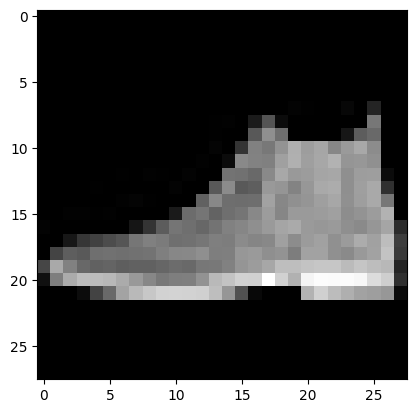

In [ ]:
example = test_ds[0]
plt.imshow(example['image'], cmap='gray');

In [ ]:
id2label[example['label']]

'Ankle boot'

In [ ]:
img = tfms(example['image'])
img.shape

torch.Size([1, 28, 28])

In [ ]:
x_batch = img.unsqueeze(0)
x_batch.shape

torch.Size([1, 1, 28, 28])

In [ ]:
x_batch = x_batch.to(device)
with torch.no_grad():
    logits = model(x_batch)
proba = torch.softmax(logits, dim=-1)
proba

tensor([[9.8491e-12, 1.8513e-11, 2.4281e-12, 1.1521e-10, 9.2054e-13, 3.4473e-06,
         4.1954e-12, 4.8489e-04, 5.0959e-11, 9.9951e-01]])

In [ ]:
pred = logits.argmax(dim=-1)
pred

tensor([9])

In [ ]:
id2label[pred[0].item()]

'Ankle boot'